<a href="https://colab.research.google.com/github/Bhavani14SA/SamsungInnovationCampus/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           3       0.25      0.40      0.31         5
           4       0.36      0.50      0.42        10
           5       0.33      0.12      0.18         8

    accuracy                           0.32        25
   macro avg       0.24      0.26      0.23        25
weighted avg       0.30      0.32      0.29        25



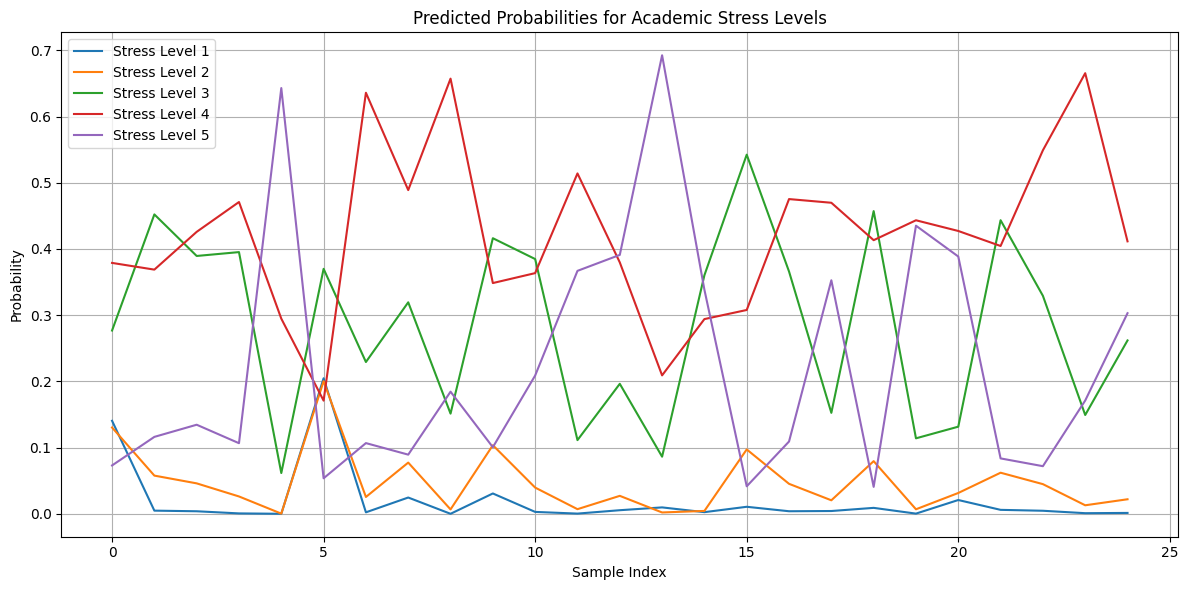

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report


df = pd.read_csv("academicStress.csv")

df.columns = df.columns.str.strip()

df = df.drop(columns=["Timestamp", "Your Academic Stage"], errors='ignore')

df = df.dropna(subset=["Rate your academic stress index"])

categorical_cols = [
    "Study Environment",
    "What coping strategy you use as a student?",
    "Do you have any bad habits like smoking, drinking on a daily basis?"
]

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=["Rate your academic stress index"])
y = df["Rate your academic stress index"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

y_proba = model.predict_proba(X_test)

plt.figure(figsize=(12, 6))
for i in range(y_proba.shape[1]):
    plt.plot(y_proba[:50, i], label=f"Stress Level {model.classes_[i]}")
plt.title("Predicted Probabilities for Academic Stress Levels")
plt.xlabel("Sample Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# New Section